## Covid 19 Case Data - United States (CA & IN focus)

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import os
import csv
import gmaps
from us import states
import numpy as np
import requests
from config import gkey
from config import rapid_api_key
from config import rapidapi_host
from pprint import pprint
import datetime

In [30]:
pd.options.display.max_rows = 200
# pd.options.display.max_rows

In [31]:
# os.getcwd()
# os.chdir('C:\\gitlab\\covid19')

In [32]:
#Import files to use with API's
county_path = 'Resources/us_counties_states.csv'
date_path = 'Resources/dates.csv'

In [33]:
# us_counties_df = pd.read_csv(county_path)
# Create a filter to bring in only California and Indiana
# mask1 = us_counties_df['State'] != 'California'
# mask2 = us_counties_df['State'] != 'Indiana'
# us_counties_df = us_counties_df[mask1 & mask2]
# us_counties_df.head()
us_counties_df = pd.read_csv(county_path)

In [34]:
date_df = pd.read_csv(date_path)

In [35]:
# mask1 = date_df['Date']>'2020-10-10'
# date_df=date_df[mask1]
# date_df.head()

### API Calls to Pull Coronavirus Data by County

In [8]:
county_list = []
state_list = []
county_list = us_counties_df['County, State'].tolist()
# date_list = date_df['Date'].tolist()
date_list = ['2020-10-20', '2020-10-21']

In [9]:
# state='Indiana'
# county='Fulton'
# date_val = '2020-10-20'
# country_state = "US " + state
# #  "city_name":county,

# url = "https://covid-19-statistics.p.rapidapi.com/reports"
# headers = {'x-rapidapi-host': rapidapi_host,'x-rapidapi-key': rapid_api_key}
# querystring = {"region_province":state,"iso":"USA","region_name":"US", "city_name":county, \
#                            "date":date_val,"q":country_state}   

# response = requests.request("GET", url, headers=headers, params=querystring).json()

# pprint(response)

In [10]:
# Run API to collect county level data
url = "https://covid-19-statistics.p.rapidapi.com/reports"
headers = {'x-rapidapi-host': rapidapi_host,'x-rapidapi-key': rapid_api_key}

# Map County Lists
map_county_state_list = []
map_new_county_list = []
map_tot_county_cases = []
map_new_county_cases = []
map_tot_county_deaths = []
map_new_county_deaths = []
map_county_date = []
map_county_lat = []
map_county_lng = []

# County Lists
county_state_list = []
new_county_list = []
tot_county_cases = []
new_county_cases = []
tot_county_deaths = []
new_county_deaths = []
county_date = []
county_lat = []
county_lng = []

record_counter = 0
set_counter = 0

for date_val in date_list:    
    try:        
        set_counter += 1

        for name in county_list:
            value = name.split(',')
            county = value[0]
            state = value[1]
            country_state = "US " + state
            record_counter +=1

            querystring = {"region_province":state,"iso":"USA","region_name":"US","city_name":county, \
                           "date":date_val,"q":country_state}   

            response = requests.request("GET", url, headers=headers, params=querystring).json()    

            try:
                # Add Map information
                map_county_state_list.append(response['data'][0]['region']['province'])
                map_new_county_list.append(response['data'][0]['region']['cities'][0]['name'])
                map_tot_county_cases.append(response['data'][0]['region']['cities'][0]['confirmed'])
                map_new_county_cases.append(response['data'][0]['region']['cities'][0]['confirmed_diff'])
                map_tot_county_deaths.append(response['data'][0]['region']['cities'][0]['deaths'])
                map_new_county_deaths.append(response['data'][0]['region']['cities'][0]['deaths_diff'])
                map_county_date.append(response['data'][0]['region']['cities'][0]['date'])
                map_county_lat.append(response['data'][0]['region']['cities'][0]['lat'])
                map_county_lng.append(response['data'][0]['region']['cities'][0]['long'])

                # Add County information
                county_state_list.append(response['data'][0]['region']['province'])
                new_county_list.append(response['data'][0]['region']['cities'][0]['name'])
                tot_county_cases.append(response['data'][0]['region']['cities'][0]['confirmed'])
                new_county_cases.append(response['data'][0]['region']['cities'][0]['confirmed_diff'])
                tot_county_deaths.append(response['data'][0]['region']['cities'][0]['deaths'])
                new_county_deaths.append(response['data'][0]['region']['cities'][0]['deaths_diff'])
                county_date.append(response['data'][0]['region']['cities'][0]['date'])
                county_lat.append(response['data'][0]['region']['cities'][0]['lat'])
                county_lng.append(response['data'][0]['region']['cities'][0]['long'])

                if record_counter > len(county_state_list):
                    record_counter = 1
                    set_counter += 1

                print(f'Processing record {record_counter} of set {set_counter} | {county}, {state}, {date_val}.')

            except:
                record_counter -= 1
                print(f'Error: County: {county} and State:{state} not found for: {date_val}')
                
        set_counter += 1
        
    except:
        print(f'Date Error: {date_val} was not processed')
            
print(f'---------------------------------Process Completed----------------------------------------')


Processing record 1 of set 1 | Autauga, Alabama, 2020-10-20.
Processing record 2 of set 1 | Baldwin, Alabama, 2020-10-20.
Processing record 3 of set 1 | Barbour, Alabama, 2020-10-20.
Processing record 4 of set 1 | Bibb, Alabama, 2020-10-20.
Processing record 5 of set 1 | Blount, Alabama, 2020-10-20.
Processing record 6 of set 1 | Bullock, Alabama, 2020-10-20.
Processing record 7 of set 1 | Butler, Alabama, 2020-10-20.
Processing record 8 of set 1 | Calhoun, Alabama, 2020-10-20.
Processing record 9 of set 1 | Chambers, Alabama, 2020-10-20.
Processing record 10 of set 1 | Cherokee, Alabama, 2020-10-20.
Processing record 11 of set 1 | Chilton, Alabama, 2020-10-20.
Processing record 12 of set 1 | Choctaw, Alabama, 2020-10-20.
Processing record 13 of set 1 | Clarke, Alabama, 2020-10-20.
Processing record 14 of set 1 | Clay, Alabama, 2020-10-20.
Processing record 15 of set 1 | Cleburne, Alabama, 2020-10-20.
Processing record 16 of set 1 | Coffee, Alabama, 2020-10-20.
Processing record 17 of 

Processing record 111 of set 1 | Crittenden, Arkansas, 2020-10-20.
Processing record 112 of set 1 | Cross, Arkansas, 2020-10-20.
Processing record 113 of set 1 | Dallas, Arkansas, 2020-10-20.
Processing record 114 of set 1 | Desha, Arkansas, 2020-10-20.
Processing record 115 of set 1 | Drew, Arkansas, 2020-10-20.
Processing record 116 of set 1 | Faulkner, Arkansas, 2020-10-20.
Processing record 117 of set 1 | Franklin, Arkansas, 2020-10-20.
Processing record 118 of set 1 | Fulton, Arkansas, 2020-10-20.
Processing record 119 of set 1 | Garland, Arkansas, 2020-10-20.
Processing record 120 of set 1 | Grant, Arkansas, 2020-10-20.
Processing record 121 of set 1 | Greene, Arkansas, 2020-10-20.
Processing record 122 of set 1 | Hempstead, Arkansas, 2020-10-20.
Processing record 123 of set 1 | Hot Spring, Arkansas, 2020-10-20.
Processing record 124 of set 1 | Howard, Arkansas, 2020-10-20.
Processing record 125 of set 1 | Independence, Arkansas, 2020-10-20.
Processing record 126 of set 1 | Izard

Processing record 235 of set 1 | Clear Creek, Colorado, 2020-10-20.
Processing record 236 of set 1 | Conejos, Colorado, 2020-10-20.
Processing record 237 of set 1 | Costilla, Colorado, 2020-10-20.
Processing record 238 of set 1 | Crowley, Colorado, 2020-10-20.
Processing record 239 of set 1 | Custer, Colorado, 2020-10-20.
Processing record 240 of set 1 | Delta, Colorado, 2020-10-20.
Error: County: Denver and State: City and Co not found for: 2020-10-20
Processing record 241 of set 1 | Dolores, Colorado, 2020-10-20.
Processing record 242 of set 1 | Douglas, Colorado, 2020-10-20.
Processing record 243 of set 1 | Eagle, Colorado, 2020-10-20.
Processing record 244 of set 1 | Elbert, Colorado, 2020-10-20.
Processing record 245 of set 1 | El Paso, Colorado, 2020-10-20.
Processing record 246 of set 1 | Fremont, Colorado, 2020-10-20.
Processing record 247 of set 1 | Garfield, Colorado, 2020-10-20.
Processing record 248 of set 1 | Gilpin, Colorado, 2020-10-20.
Processing record 249 of set 1 | G

Processing record 362 of set 1 | Volusia, Florida, 2020-10-20.
Processing record 363 of set 1 | Wakulla, Florida, 2020-10-20.
Processing record 364 of set 1 | Walton, Florida, 2020-10-20.
Processing record 365 of set 1 | Washington, Florida, 2020-10-20.
Processing record 366 of set 1 | Appling, Georgia, 2020-10-20.
Processing record 367 of set 1 | Atkinson, Georgia, 2020-10-20.
Processing record 368 of set 1 | Bacon, Georgia, 2020-10-20.
Processing record 369 of set 1 | Baker, Georgia, 2020-10-20.
Processing record 370 of set 1 | Baldwin, Georgia, 2020-10-20.
Processing record 371 of set 1 | Banks, Georgia, 2020-10-20.
Processing record 372 of set 1 | Barrow, Georgia, 2020-10-20.
Processing record 373 of set 1 | Bartow, Georgia, 2020-10-20.
Processing record 374 of set 1 | Ben Hill, Georgia, 2020-10-20.
Processing record 375 of set 1 | Berrien, Georgia, 2020-10-20.
Processing record 376 of set 1 | Bibb, Georgia, 2020-10-20.
Processing record 377 of set 1 | Bleckley, Georgia, 2020-10-20

Processing record 493 of set 1 | Stewart, Georgia, 2020-10-20.
Processing record 494 of set 1 | Sumter, Georgia, 2020-10-20.
Processing record 495 of set 1 | Talbot, Georgia, 2020-10-20.
Processing record 496 of set 1 | Taliaferro, Georgia, 2020-10-20.
Processing record 497 of set 1 | Tattnall, Georgia, 2020-10-20.
Processing record 498 of set 1 | Taylor, Georgia, 2020-10-20.
Processing record 499 of set 1 | Telfair, Georgia, 2020-10-20.
Processing record 500 of set 1 | Terrell, Georgia, 2020-10-20.
Processing record 501 of set 1 | Thomas, Georgia, 2020-10-20.
Processing record 502 of set 1 | Tift, Georgia, 2020-10-20.
Processing record 503 of set 1 | Toombs, Georgia, 2020-10-20.
Processing record 504 of set 1 | Towns, Georgia, 2020-10-20.
Processing record 505 of set 1 | Treutlen, Georgia, 2020-10-20.
Processing record 506 of set 1 | Troup, Georgia, 2020-10-20.
Processing record 507 of set 1 | Turner, Georgia, 2020-10-20.
Processing record 508 of set 1 | Twiggs, Georgia, 2020-10-20.
P

Processing record 620 of set 1 | Lee, Illinois, 2020-10-20.
Processing record 621 of set 1 | Livingston, Illinois, 2020-10-20.
Processing record 622 of set 1 | Logan, Illinois, 2020-10-20.
Processing record 623 of set 1 | McDonough, Illinois, 2020-10-20.
Processing record 624 of set 1 | McHenry, Illinois, 2020-10-20.
Processing record 625 of set 1 | McLean, Illinois, 2020-10-20.
Processing record 626 of set 1 | Macon, Illinois, 2020-10-20.
Processing record 627 of set 1 | Macoupin, Illinois, 2020-10-20.
Processing record 628 of set 1 | Madison, Illinois, 2020-10-20.
Processing record 629 of set 1 | Marion, Illinois, 2020-10-20.
Processing record 630 of set 1 | Marshall, Illinois, 2020-10-20.
Processing record 631 of set 1 | Mason, Illinois, 2020-10-20.
Processing record 632 of set 1 | Massac, Illinois, 2020-10-20.
Processing record 633 of set 1 | Menard, Illinois, 2020-10-20.
Processing record 634 of set 1 | Mercer, Illinois, 2020-10-20.
Processing record 635 of set 1 | Monroe, Illinoi

Processing record 750 of set 1 | Tipton, Indiana, 2020-10-20.
Processing record 751 of set 1 | Union, Indiana, 2020-10-20.
Processing record 752 of set 1 | Vanderburgh, Indiana, 2020-10-20.
Processing record 753 of set 1 | Vermillion, Indiana, 2020-10-20.
Processing record 754 of set 1 | Vigo, Indiana, 2020-10-20.
Processing record 755 of set 1 | Wabash, Indiana, 2020-10-20.
Processing record 756 of set 1 | Warren, Indiana, 2020-10-20.
Processing record 757 of set 1 | Warrick, Indiana, 2020-10-20.
Processing record 758 of set 1 | Washington, Indiana, 2020-10-20.
Processing record 759 of set 1 | Wayne, Indiana, 2020-10-20.
Processing record 760 of set 1 | Wells, Indiana, 2020-10-20.
Processing record 761 of set 1 | White, Indiana, 2020-10-20.
Processing record 762 of set 1 | Whitley, Indiana, 2020-10-20.
Processing record 763 of set 1 | Adair, Iowa, 2020-10-20.
Processing record 764 of set 1 | Adams, Iowa, 2020-10-20.
Processing record 765 of set 1 | Allamakee, Iowa, 2020-10-20.
Process

Processing record 886 of set 1 | Elk, Kansas, 2020-10-20.
Processing record 887 of set 1 | Ellis, Kansas, 2020-10-20.
Processing record 888 of set 1 | Ellsworth, Kansas, 2020-10-20.
Processing record 889 of set 1 | Finney, Kansas, 2020-10-20.
Processing record 890 of set 1 | Ford, Kansas, 2020-10-20.
Processing record 891 of set 1 | Franklin, Kansas, 2020-10-20.
Processing record 892 of set 1 | Geary, Kansas, 2020-10-20.
Processing record 893 of set 1 | Gove, Kansas, 2020-10-20.
Processing record 894 of set 1 | Graham, Kansas, 2020-10-20.
Processing record 895 of set 1 | Grant, Kansas, 2020-10-20.
Processing record 896 of set 1 | Gray, Kansas, 2020-10-20.
Processing record 897 of set 1 | Greeley, Kansas, 2020-10-20.
Processing record 898 of set 1 | Greenwood, Kansas, 2020-10-20.
Processing record 899 of set 1 | Hamilton, Kansas, 2020-10-20.
Processing record 900 of set 1 | Harper, Kansas, 2020-10-20.
Processing record 901 of set 1 | Harvey, Kansas, 2020-10-20.
Processing record 902 of 

Processing record 1018 of set 1 | Henry, Kentucky, 2020-10-20.
Processing record 1019 of set 1 | Hickman, Kentucky, 2020-10-20.
Processing record 1020 of set 1 | Hopkins, Kentucky, 2020-10-20.
Processing record 1021 of set 1 | Jackson, Kentucky, 2020-10-20.
Processing record 1022 of set 1 | Jefferson, Kentucky, 2020-10-20.
Processing record 1023 of set 1 | Jessamine, Kentucky, 2020-10-20.
Processing record 1024 of set 1 | Johnson, Kentucky, 2020-10-20.
Processing record 1025 of set 1 | Kenton, Kentucky, 2020-10-20.
Processing record 1026 of set 1 | Knott, Kentucky, 2020-10-20.
Processing record 1027 of set 1 | Knox, Kentucky, 2020-10-20.
Processing record 1028 of set 1 | Larue, Kentucky, 2020-10-20.
Processing record 1029 of set 1 | Laurel, Kentucky, 2020-10-20.
Processing record 1030 of set 1 | Lawrence, Kentucky, 2020-10-20.
Processing record 1031 of set 1 | Lee, Kentucky, 2020-10-20.
Processing record 1032 of set 1 | Leslie, Kentucky, 2020-10-20.
Processing record 1033 of set 1 | Le

Processing record 1142 of set 1 | Union, Louisiana, 2020-10-20.
Processing record 1143 of set 1 | Vermilion, Louisiana, 2020-10-20.
Processing record 1144 of set 1 | Vernon, Louisiana, 2020-10-20.
Processing record 1145 of set 1 | Washington, Louisiana, 2020-10-20.
Processing record 1146 of set 1 | Webster, Louisiana, 2020-10-20.
Processing record 1147 of set 1 | West Baton Rouge, Louisiana, 2020-10-20.
Processing record 1148 of set 1 | West Carroll, Louisiana, 2020-10-20.
Processing record 1149 of set 1 | West Feliciana, Louisiana, 2020-10-20.
Processing record 1150 of set 1 | Winn, Louisiana, 2020-10-20.
Processing record 1151 of set 1 | Androscoggin, Maine, 2020-10-20.
Processing record 1152 of set 1 | Aroostook, Maine, 2020-10-20.
Processing record 1153 of set 1 | Cumberland, Maine, 2020-10-20.
Processing record 1154 of set 1 | Franklin, Maine, 2020-10-20.
Processing record 1155 of set 1 | Hancock, Maine, 2020-10-20.
Processing record 1156 of set 1 | Kennebec, Maine, 2020-10-20.
Pr

Processing record 1265 of set 1 | Oakland, Michigan, 2020-10-20.
Processing record 1266 of set 1 | Oceana, Michigan, 2020-10-20.
Processing record 1267 of set 1 | Ogemaw, Michigan, 2020-10-20.
Processing record 1268 of set 1 | Ontonagon, Michigan, 2020-10-20.
Processing record 1269 of set 1 | Osceola, Michigan, 2020-10-20.
Processing record 1270 of set 1 | Oscoda, Michigan, 2020-10-20.
Processing record 1271 of set 1 | Otsego, Michigan, 2020-10-20.
Processing record 1272 of set 1 | Ottawa, Michigan, 2020-10-20.
Processing record 1273 of set 1 | Presque Isle, Michigan, 2020-10-20.
Processing record 1274 of set 1 | Roscommon, Michigan, 2020-10-20.
Processing record 1275 of set 1 | Saginaw, Michigan, 2020-10-20.
Processing record 1276 of set 1 | St. Clair, Michigan, 2020-10-20.
Processing record 1277 of set 1 | St. Joseph, Michigan, 2020-10-20.
Processing record 1278 of set 1 | Sanilac, Michigan, 2020-10-20.
Processing record 1279 of set 1 | Schoolcraft, Michigan, 2020-10-20.
Processing r

Processing record 1389 of set 1 | DeSoto, Mississippi, 2020-10-20.
Processing record 1390 of set 1 | Forrest, Mississippi, 2020-10-20.
Processing record 1391 of set 1 | Franklin, Mississippi, 2020-10-20.
Processing record 1392 of set 1 | George, Mississippi, 2020-10-20.
Processing record 1393 of set 1 | Greene, Mississippi, 2020-10-20.
Processing record 1394 of set 1 | Grenada, Mississippi, 2020-10-20.
Processing record 1395 of set 1 | Hancock, Mississippi, 2020-10-20.
Processing record 1396 of set 1 | Harrison, Mississippi, 2020-10-20.
Processing record 1397 of set 1 | Hinds, Mississippi, 2020-10-20.
Processing record 1398 of set 1 | Holmes, Mississippi, 2020-10-20.
Processing record 1399 of set 1 | Humphreys, Mississippi, 2020-10-20.
Processing record 1400 of set 1 | Issaquena, Mississippi, 2020-10-20.
Processing record 1401 of set 1 | Itawamba, Mississippi, 2020-10-20.
Processing record 1402 of set 1 | Jackson, Mississippi, 2020-10-20.
Processing record 1403 of set 1 | Jasper, Missi

Processing record 1513 of set 1 | Livingston, Missouri, 2020-10-20.
Processing record 1514 of set 1 | McDonald, Missouri, 2020-10-20.
Processing record 1515 of set 1 | Macon, Missouri, 2020-10-20.
Processing record 1516 of set 1 | Madison, Missouri, 2020-10-20.
Processing record 1517 of set 1 | Maries, Missouri, 2020-10-20.
Processing record 1518 of set 1 | Marion, Missouri, 2020-10-20.
Processing record 1519 of set 1 | Mercer, Missouri, 2020-10-20.
Processing record 1520 of set 1 | Miller, Missouri, 2020-10-20.
Processing record 1521 of set 1 | Mississippi, Missouri, 2020-10-20.
Processing record 1522 of set 1 | Moniteau, Missouri, 2020-10-20.
Processing record 1523 of set 1 | Monroe, Missouri, 2020-10-20.
Processing record 1524 of set 1 | Montgomery, Missouri, 2020-10-20.
Processing record 1525 of set 1 | Morgan, Missouri, 2020-10-20.
Processing record 1526 of set 1 | New Madrid, Missouri, 2020-10-20.
Processing record 1527 of set 1 | Newton, Missouri, 2020-10-20.
Processing record 1

Processing record 1640 of set 1 | Chase, Nebraska, 2020-10-20.
Processing record 1641 of set 1 | Cherry, Nebraska, 2020-10-20.
Processing record 1642 of set 1 | Cheyenne, Nebraska, 2020-10-20.
Processing record 1643 of set 1 | Clay, Nebraska, 2020-10-20.
Processing record 1644 of set 1 | Colfax, Nebraska, 2020-10-20.
Processing record 1645 of set 1 | Cuming, Nebraska, 2020-10-20.
Processing record 1646 of set 1 | Custer, Nebraska, 2020-10-20.
Processing record 1647 of set 1 | Dakota, Nebraska, 2020-10-20.
Processing record 1648 of set 1 | Dawes, Nebraska, 2020-10-20.
Processing record 1649 of set 1 | Dawson, Nebraska, 2020-10-20.
Processing record 1650 of set 1 | Deuel, Nebraska, 2020-10-20.
Processing record 1651 of set 1 | Dixon, Nebraska, 2020-10-20.
Processing record 1652 of set 1 | Dodge, Nebraska, 2020-10-20.
Processing record 1653 of set 1 | Douglas, Nebraska, 2020-10-20.
Processing record 1654 of set 1 | Dundy, Nebraska, 2020-10-20.
Processing record 1655 of set 1 | Fillmore, N

Processing record 1765 of set 1 | Warren, New Jersey, 2020-10-20.
Processing record 1766 of set 1 | Bernalillo, New Mexico, 2020-10-20.
Processing record 1767 of set 1 | Catron, New Mexico, 2020-10-20.
Processing record 1768 of set 1 | Chaves, New Mexico, 2020-10-20.
Processing record 1769 of set 1 | Cibola, New Mexico, 2020-10-20.
Processing record 1770 of set 1 | Colfax, New Mexico, 2020-10-20.
Processing record 1771 of set 1 | Curry, New Mexico, 2020-10-20.
Processing record 1772 of set 1 | De Baca, New Mexico, 2020-10-20.
Processing record 1773 of set 1 | Doña Ana, New Mexico, 2020-10-20.
Processing record 1774 of set 1 | Eddy, New Mexico, 2020-10-20.
Processing record 1775 of set 1 | Grant, New Mexico, 2020-10-20.
Processing record 1776 of set 1 | Guadalupe, New Mexico, 2020-10-20.
Processing record 1777 of set 1 | Harding, New Mexico, 2020-10-20.
Processing record 1778 of set 1 | Hidalgo, New Mexico, 2020-10-20.
Processing record 1779 of set 1 | Lea, New Mexico, 2020-10-20.
Proce

Processing record 1888 of set 1 | Dare, North Carolina, 2020-10-20.
Processing record 1889 of set 1 | Davidson, North Carolina, 2020-10-20.
Processing record 1890 of set 1 | Davie, North Carolina, 2020-10-20.
Processing record 1891 of set 1 | Duplin, North Carolina, 2020-10-20.
Processing record 1892 of set 1 | Durham, North Carolina, 2020-10-20.
Processing record 1893 of set 1 | Edgecombe, North Carolina, 2020-10-20.
Processing record 1894 of set 1 | Forsyth, North Carolina, 2020-10-20.
Processing record 1895 of set 1 | Franklin, North Carolina, 2020-10-20.
Processing record 1896 of set 1 | Gaston, North Carolina, 2020-10-20.
Processing record 1897 of set 1 | Gates, North Carolina, 2020-10-20.
Processing record 1898 of set 1 | Graham, North Carolina, 2020-10-20.
Processing record 1899 of set 1 | Granville, North Carolina, 2020-10-20.
Processing record 1900 of set 1 | Greene, North Carolina, 2020-10-20.
Processing record 1901 of set 1 | Guilford, North Carolina, 2020-10-20.
Processing 

Processing record 2006 of set 1 | Steele, North Dakota, 2020-10-20.
Processing record 2007 of set 1 | Stutsman, North Dakota, 2020-10-20.
Processing record 2008 of set 1 | Towner, North Dakota, 2020-10-20.
Processing record 2009 of set 1 | Traill, North Dakota, 2020-10-20.
Processing record 2010 of set 1 | Walsh, North Dakota, 2020-10-20.
Processing record 2011 of set 1 | Ward, North Dakota, 2020-10-20.
Processing record 2012 of set 1 | Wells, North Dakota, 2020-10-20.
Processing record 2013 of set 1 | Williams, North Dakota, 2020-10-20.
Processing record 2014 of set 1 | Adams, Ohio, 2020-10-20.
Processing record 2015 of set 1 | Allen, Ohio, 2020-10-20.
Processing record 2016 of set 1 | Ashland, Ohio, 2020-10-20.
Processing record 2017 of set 1 | Ashtabula, Ohio, 2020-10-20.
Processing record 2018 of set 1 | Athens, Ohio, 2020-10-20.
Processing record 2019 of set 1 | Auglaize, Ohio, 2020-10-20.
Processing record 2020 of set 1 | Belmont, Ohio, 2020-10-20.
Processing record 2021 of set 1

Processing record 2138 of set 1 | Kingfisher, Oklahoma, 2020-10-20.
Processing record 2139 of set 1 | Kiowa, Oklahoma, 2020-10-20.
Processing record 2140 of set 1 | Latimer, Oklahoma, 2020-10-20.
Processing record 2141 of set 1 | Le Flore, Oklahoma, 2020-10-20.
Processing record 2142 of set 1 | Lincoln, Oklahoma, 2020-10-20.
Processing record 2143 of set 1 | Logan, Oklahoma, 2020-10-20.
Processing record 2144 of set 1 | Love, Oklahoma, 2020-10-20.
Processing record 2145 of set 1 | McClain, Oklahoma, 2020-10-20.
Processing record 2146 of set 1 | McCurtain, Oklahoma, 2020-10-20.
Processing record 2147 of set 1 | McIntosh, Oklahoma, 2020-10-20.
Processing record 2148 of set 1 | Major, Oklahoma, 2020-10-20.
Processing record 2149 of set 1 | Marshall, Oklahoma, 2020-10-20.
Processing record 2150 of set 1 | Mayes, Oklahoma, 2020-10-20.
Processing record 2151 of set 1 | Murray, Oklahoma, 2020-10-20.
Processing record 2152 of set 1 | Muskogee, Oklahoma, 2020-10-20.
Processing record 2153 of se

Processing record 2263 of set 1 | Northumberland, Pennsylvania, 2020-10-20.
Processing record 2264 of set 1 | Perry, Pennsylvania, 2020-10-20.
Processing record 2265 of set 1 | Philadelphia, Pennsylvania, 2020-10-20.
Processing record 2266 of set 1 | Pike, Pennsylvania, 2020-10-20.
Processing record 2267 of set 1 | Potter, Pennsylvania, 2020-10-20.
Processing record 2268 of set 1 | Schuylkill, Pennsylvania, 2020-10-20.
Processing record 2269 of set 1 | Snyder, Pennsylvania, 2020-10-20.
Processing record 2270 of set 1 | Somerset, Pennsylvania, 2020-10-20.
Processing record 2271 of set 1 | Sullivan, Pennsylvania, 2020-10-20.
Processing record 2272 of set 1 | Susquehanna, Pennsylvania, 2020-10-20.
Processing record 2273 of set 1 | Tioga, Pennsylvania, 2020-10-20.
Processing record 2274 of set 1 | Union, Pennsylvania, 2020-10-20.
Processing record 2275 of set 1 | Venango, Pennsylvania, 2020-10-20.
Processing record 2276 of set 1 | Warren, Pennsylvania, 2020-10-20.
Processing record 2277 of

Processing record 2380 of set 1 | Miner, South Dakota, 2020-10-20.
Processing record 2381 of set 1 | Minnehaha, South Dakota, 2020-10-20.
Processing record 2382 of set 1 | Moody, South Dakota, 2020-10-20.
Processing record 2383 of set 1 | Pennington, South Dakota, 2020-10-20.
Processing record 2384 of set 1 | Perkins, South Dakota, 2020-10-20.
Processing record 2385 of set 1 | Potter, South Dakota, 2020-10-20.
Processing record 2386 of set 1 | Roberts, South Dakota, 2020-10-20.
Processing record 2387 of set 1 | Sanborn, South Dakota, 2020-10-20.
Error: County: Shannon and State:South Dakota not found for: 2020-10-20
Processing record 2388 of set 1 | Spink, South Dakota, 2020-10-20.
Processing record 2389 of set 1 | Stanley, South Dakota, 2020-10-20.
Processing record 2390 of set 1 | Sully, South Dakota, 2020-10-20.
Processing record 2391 of set 1 | Todd, South Dakota, 2020-10-20.
Processing record 2392 of set 1 | Tripp, South Dakota, 2020-10-20.
Processing record 2393 of set 1 | Turner

Processing record 2504 of set 1 | Baylor, Texas, 2020-10-20.
Processing record 2505 of set 1 | Bee, Texas, 2020-10-20.
Processing record 2506 of set 1 | Bell, Texas, 2020-10-20.
Processing record 2507 of set 1 | Bexar, Texas, 2020-10-20.
Processing record 2508 of set 1 | Blanco, Texas, 2020-10-20.
Processing record 2509 of set 1 | Borden, Texas, 2020-10-20.
Processing record 2510 of set 1 | Bosque, Texas, 2020-10-20.
Processing record 2511 of set 1 | Bowie, Texas, 2020-10-20.
Processing record 2512 of set 1 | Brazoria, Texas, 2020-10-20.
Processing record 2513 of set 1 | Brazos, Texas, 2020-10-20.
Processing record 2514 of set 1 | Brewster, Texas, 2020-10-20.
Processing record 2515 of set 1 | Briscoe, Texas, 2020-10-20.
Processing record 2516 of set 1 | Brooks, Texas, 2020-10-20.
Processing record 2517 of set 1 | Brown, Texas, 2020-10-20.
Processing record 2518 of set 1 | Burleson, Texas, 2020-10-20.
Processing record 2519 of set 1 | Burnet, Texas, 2020-10-20.
Processing record 2520 of

Processing record 2638 of set 1 | Liberty, Texas, 2020-10-20.
Processing record 2639 of set 1 | Limestone, Texas, 2020-10-20.
Processing record 2640 of set 1 | Lipscomb, Texas, 2020-10-20.
Processing record 2641 of set 1 | Live Oak, Texas, 2020-10-20.
Processing record 2642 of set 1 | Llano, Texas, 2020-10-20.
Processing record 2643 of set 1 | Loving, Texas, 2020-10-20.
Processing record 2644 of set 1 | Lubbock, Texas, 2020-10-20.
Processing record 2645 of set 1 | Lynn, Texas, 2020-10-20.
Processing record 2646 of set 1 | McCulloch, Texas, 2020-10-20.
Processing record 2647 of set 1 | McLennan, Texas, 2020-10-20.
Processing record 2648 of set 1 | McMullen, Texas, 2020-10-20.
Processing record 2649 of set 1 | Madison, Texas, 2020-10-20.
Processing record 2650 of set 1 | Marion, Texas, 2020-10-20.
Processing record 2651 of set 1 | Martin, Texas, 2020-10-20.
Processing record 2652 of set 1 | Mason, Texas, 2020-10-20.
Processing record 2653 of set 1 | Matagorda, Texas, 2020-10-20.
Processi

Processing record 2752 of set 1 | Utah, Utah, 2020-10-20.
Processing record 2753 of set 1 | Wasatch, Utah, 2020-10-20.
Error: County: Washington and State:Utah not found for: 2020-10-20
Error: County: Wayne and State:Utah not found for: 2020-10-20
Error: County: Weber and State:Utah not found for: 2020-10-20
Processing record 2754 of set 1 | Addison, Vermont, 2020-10-20.
Processing record 2755 of set 1 | Bennington, Vermont, 2020-10-20.
Processing record 2756 of set 1 | Caledonia, Vermont, 2020-10-20.
Processing record 2757 of set 1 | Chittenden, Vermont, 2020-10-20.
Processing record 2758 of set 1 | Essex, Vermont, 2020-10-20.
Processing record 2759 of set 1 | Franklin, Vermont, 2020-10-20.
Processing record 2760 of set 1 | Grand Isle, Vermont, 2020-10-20.
Processing record 2761 of set 1 | Lamoille, Vermont, 2020-10-20.
Processing record 2762 of set 1 | Orange, Vermont, 2020-10-20.
Processing record 2763 of set 1 | Orleans, Vermont, 2020-10-20.
Processing record 2764 of set 1 | Rutlan

Processing record 2873 of set 1 | Fairfax, Virginia, 2020-10-20.
Processing record 2874 of set 1 | Falls Church, Virginia, 2020-10-20.
Processing record 2875 of set 1 | Franklin, Virginia, 2020-10-20.
Processing record 2876 of set 1 | Fredericksburg, Virginia, 2020-10-20.
Processing record 2877 of set 1 | Galax, Virginia, 2020-10-20.
Processing record 2878 of set 1 | Hampton, Virginia, 2020-10-20.
Processing record 2879 of set 1 | Harrisonburg, Virginia, 2020-10-20.
Processing record 2880 of set 1 | Hopewell, Virginia, 2020-10-20.
Processing record 2881 of set 1 | Lexington, Virginia, 2020-10-20.
Processing record 2882 of set 1 | Lynchburg, Virginia, 2020-10-20.
Processing record 2883 of set 1 | Manassas, Virginia, 2020-10-20.
Processing record 2884 of set 1 | Manassas Park, Virginia, 2020-10-20.
Processing record 2885 of set 1 | Martinsville, Virginia, 2020-10-20.
Processing record 2886 of set 1 | Newport News, Virginia, 2020-10-20.
Processing record 2887 of set 1 | Norfolk, Virginia,

Processing record 2993 of set 1 | Wirt, West Virginia, 2020-10-20.
Processing record 2994 of set 1 | Wood, West Virginia, 2020-10-20.
Processing record 2995 of set 1 | Wyoming, West Virginia, 2020-10-20.
Processing record 2996 of set 1 | Adams, Wisconsin, 2020-10-20.
Processing record 2997 of set 1 | Ashland, Wisconsin, 2020-10-20.
Processing record 2998 of set 1 | Barron, Wisconsin, 2020-10-20.
Processing record 2999 of set 1 | Bayfield, Wisconsin, 2020-10-20.
Processing record 3000 of set 1 | Brown, Wisconsin, 2020-10-20.
Processing record 3001 of set 1 | Buffalo, Wisconsin, 2020-10-20.
Processing record 3002 of set 1 | Burnett, Wisconsin, 2020-10-20.
Processing record 3003 of set 1 | Calumet, Wisconsin, 2020-10-20.
Processing record 3004 of set 1 | Chippewa, Wisconsin, 2020-10-20.
Processing record 3005 of set 1 | Clark, Wisconsin, 2020-10-20.
Processing record 3006 of set 1 | Columbia, Wisconsin, 2020-10-20.
Processing record 3007 of set 1 | Crawford, Wisconsin, 2020-10-20.
Process

Processing record 3119 of set 3 | Fayette, Alabama, 2020-10-21.
Processing record 3120 of set 3 | Franklin, Alabama, 2020-10-21.
Processing record 3121 of set 3 | Geneva, Alabama, 2020-10-21.
Processing record 3122 of set 3 | Greene, Alabama, 2020-10-21.
Processing record 3123 of set 3 | Hale, Alabama, 2020-10-21.
Processing record 3124 of set 3 | Henry, Alabama, 2020-10-21.
Processing record 3125 of set 3 | Houston, Alabama, 2020-10-21.
Processing record 3126 of set 3 | Jackson, Alabama, 2020-10-21.
Processing record 3127 of set 3 | Jefferson, Alabama, 2020-10-21.
Processing record 3128 of set 3 | Lamar, Alabama, 2020-10-21.
Processing record 3129 of set 3 | Lauderdale, Alabama, 2020-10-21.
Processing record 3130 of set 3 | Lawrence, Alabama, 2020-10-21.
Processing record 3131 of set 3 | Lee, Alabama, 2020-10-21.
Processing record 3132 of set 3 | Limestone, Alabama, 2020-10-21.
Processing record 3133 of set 3 | Lowndes, Alabama, 2020-10-21.
Processing record 3134 of set 3 | Macon, Ala

Processing record 3225 of set 3 | Logan, Arkansas, 2020-10-21.
Processing record 3226 of set 3 | Lonoke, Arkansas, 2020-10-21.
Processing record 3227 of set 3 | Madison, Arkansas, 2020-10-21.
Processing record 3228 of set 3 | Marion, Arkansas, 2020-10-21.
Processing record 3229 of set 3 | Miller, Arkansas, 2020-10-21.
Processing record 3230 of set 3 | Mississippi, Arkansas, 2020-10-21.
Processing record 3231 of set 3 | Monroe, Arkansas, 2020-10-21.
Processing record 3232 of set 3 | Montgomery, Arkansas, 2020-10-21.
Processing record 3233 of set 3 | Nevada, Arkansas, 2020-10-21.
Processing record 3234 of set 3 | Newton, Arkansas, 2020-10-21.
Processing record 3235 of set 3 | Ouachita, Arkansas, 2020-10-21.
Processing record 3236 of set 3 | Perry, Arkansas, 2020-10-21.
Processing record 3237 of set 3 | Phillips, Arkansas, 2020-10-21.
Processing record 3238 of set 3 | Pike, Arkansas, 2020-10-21.
Processing record 3239 of set 3 | Poinsett, Arkansas, 2020-10-21.
Processing record 3240 of se

Processing record 3346 of set 3 | Kit Carson, Colorado, 2020-10-21.
Processing record 3347 of set 3 | Lake, Colorado, 2020-10-21.
Processing record 3348 of set 3 | La Plata, Colorado, 2020-10-21.
Processing record 3349 of set 3 | Larimer, Colorado, 2020-10-21.
Processing record 3350 of set 3 | Las Animas, Colorado, 2020-10-21.
Processing record 3351 of set 3 | Lincoln, Colorado, 2020-10-21.
Processing record 3352 of set 3 | Logan, Colorado, 2020-10-21.
Processing record 3353 of set 3 | Mesa, Colorado, 2020-10-21.
Processing record 3354 of set 3 | Mineral, Colorado, 2020-10-21.
Processing record 3355 of set 3 | Moffat, Colorado, 2020-10-21.
Processing record 3356 of set 3 | Montezuma, Colorado, 2020-10-21.
Processing record 3357 of set 3 | Montrose, Colorado, 2020-10-21.
Processing record 3358 of set 3 | Morgan, Colorado, 2020-10-21.
Processing record 3359 of set 3 | Otero, Colorado, 2020-10-21.
Processing record 3360 of set 3 | Ouray, Colorado, 2020-10-21.
Processing record 3361 of set

Processing record 3472 of set 3 | Burke, Georgia, 2020-10-21.
Processing record 3473 of set 3 | Butts, Georgia, 2020-10-21.
Processing record 3474 of set 3 | Calhoun, Georgia, 2020-10-21.
Processing record 3475 of set 3 | Camden, Georgia, 2020-10-21.
Processing record 3476 of set 3 | Candler, Georgia, 2020-10-21.
Processing record 3477 of set 3 | Carroll, Georgia, 2020-10-21.
Processing record 3478 of set 3 | Catoosa, Georgia, 2020-10-21.
Processing record 3479 of set 3 | Charlton, Georgia, 2020-10-21.
Processing record 3480 of set 3 | Chatham, Georgia, 2020-10-21.
Processing record 3481 of set 3 | Chattahoochee, Georgia, 2020-10-21.
Processing record 3482 of set 3 | Chattooga, Georgia, 2020-10-21.
Processing record 3483 of set 3 | Cherokee, Georgia, 2020-10-21.
Processing record 3484 of set 3 | Clarke, Georgia, 2020-10-21.
Processing record 3485 of set 3 | Clay, Georgia, 2020-10-21.
Processing record 3486 of set 3 | Clayton, Georgia, 2020-10-21.
Processing record 3487 of set 3 | Clinc

Processing record 3601 of set 3 | Walker, Georgia, 2020-10-21.
Processing record 3602 of set 3 | Walton, Georgia, 2020-10-21.
Processing record 3603 of set 3 | Ware, Georgia, 2020-10-21.
Processing record 3604 of set 3 | Warren, Georgia, 2020-10-21.
Processing record 3605 of set 3 | Washington, Georgia, 2020-10-21.
Processing record 3606 of set 3 | Wayne, Georgia, 2020-10-21.
Processing record 3607 of set 3 | Webster, Georgia, 2020-10-21.
Processing record 3608 of set 3 | Wheeler, Georgia, 2020-10-21.
Processing record 3609 of set 3 | White, Georgia, 2020-10-21.
Processing record 3610 of set 3 | Whitfield, Georgia, 2020-10-21.
Processing record 3611 of set 3 | Wilcox, Georgia, 2020-10-21.
Processing record 3612 of set 3 | Wilkes, Georgia, 2020-10-21.
Processing record 3613 of set 3 | Wilkinson, Georgia, 2020-10-21.
Processing record 3614 of set 3 | Worth, Georgia, 2020-10-21.
Error: County: Hawaii and State:Hawai?i not found for: 2020-10-21
Error: County: Honolulu and State: City and C

Processing record 3725 of set 3 | Monroe, Illinois, 2020-10-21.
Processing record 3726 of set 3 | Montgomery, Illinois, 2020-10-21.
Processing record 3727 of set 3 | Morgan, Illinois, 2020-10-21.
Processing record 3728 of set 3 | Moultrie, Illinois, 2020-10-21.
Processing record 3729 of set 3 | Ogle, Illinois, 2020-10-21.
Processing record 3730 of set 3 | Peoria, Illinois, 2020-10-21.
Processing record 3731 of set 3 | Perry, Illinois, 2020-10-21.
Processing record 3732 of set 3 | Piatt, Illinois, 2020-10-21.
Processing record 3733 of set 3 | Pike, Illinois, 2020-10-21.
Processing record 3734 of set 3 | Pope, Illinois, 2020-10-21.
Processing record 3735 of set 3 | Pulaski, Illinois, 2020-10-21.
Processing record 3736 of set 3 | Putnam, Illinois, 2020-10-21.
Processing record 3737 of set 3 | Randolph, Illinois, 2020-10-21.
Processing record 3738 of set 3 | Richland, Illinois, 2020-10-21.
Processing record 3739 of set 3 | Rock Island, Illinois, 2020-10-21.
Processing record 3740 of set 3 

Processing record 3854 of set 3 | Adams, Iowa, 2020-10-21.
Processing record 3855 of set 3 | Allamakee, Iowa, 2020-10-21.
Processing record 3856 of set 3 | Appanoose, Iowa, 2020-10-21.
Processing record 3857 of set 3 | Audubon, Iowa, 2020-10-21.
Processing record 3858 of set 3 | Benton, Iowa, 2020-10-21.
Processing record 3859 of set 3 | Black Hawk, Iowa, 2020-10-21.
Processing record 3860 of set 3 | Boone, Iowa, 2020-10-21.
Processing record 3861 of set 3 | Bremer, Iowa, 2020-10-21.
Processing record 3862 of set 3 | Buchanan, Iowa, 2020-10-21.
Processing record 3863 of set 3 | Buena Vista, Iowa, 2020-10-21.
Processing record 3864 of set 3 | Butler, Iowa, 2020-10-21.
Processing record 3865 of set 3 | Calhoun, Iowa, 2020-10-21.
Processing record 3866 of set 3 | Carroll, Iowa, 2020-10-21.
Processing record 3867 of set 3 | Cass, Iowa, 2020-10-21.
Processing record 3868 of set 3 | Cedar, Iowa, 2020-10-21.
Processing record 3869 of set 3 | Cerro Gordo, Iowa, 2020-10-21.
Processing record 38

Processing record 3988 of set 3 | Greenwood, Kansas, 2020-10-21.
Processing record 3989 of set 3 | Hamilton, Kansas, 2020-10-21.
Processing record 3990 of set 3 | Harper, Kansas, 2020-10-21.
Processing record 3991 of set 3 | Harvey, Kansas, 2020-10-21.
Processing record 3992 of set 3 | Haskell, Kansas, 2020-10-21.
Processing record 3993 of set 3 | Hodgeman, Kansas, 2020-10-21.
Processing record 3994 of set 3 | Jackson, Kansas, 2020-10-21.
Processing record 3995 of set 3 | Jefferson, Kansas, 2020-10-21.
Processing record 3996 of set 3 | Jewell, Kansas, 2020-10-21.
Processing record 3997 of set 3 | Johnson, Kansas, 2020-10-21.
Processing record 3998 of set 3 | Kearny, Kansas, 2020-10-21.
Processing record 3999 of set 3 | Kingman, Kansas, 2020-10-21.
Processing record 4000 of set 3 | Kiowa, Kansas, 2020-10-21.
Processing record 4001 of set 3 | Labette, Kansas, 2020-10-21.
Processing record 4002 of set 3 | Lane, Kansas, 2020-10-21.
Processing record 4003 of set 3 | Leavenworth, Kansas, 202

Processing record 4117 of set 3 | Knox, Kentucky, 2020-10-21.
Processing record 4118 of set 3 | Larue, Kentucky, 2020-10-21.
Processing record 4119 of set 3 | Laurel, Kentucky, 2020-10-21.
Processing record 4120 of set 3 | Lawrence, Kentucky, 2020-10-21.
Processing record 4121 of set 3 | Lee, Kentucky, 2020-10-21.
Processing record 4122 of set 3 | Leslie, Kentucky, 2020-10-21.
Processing record 4123 of set 3 | Letcher, Kentucky, 2020-10-21.
Processing record 4124 of set 3 | Lewis, Kentucky, 2020-10-21.
Processing record 4125 of set 3 | Lincoln, Kentucky, 2020-10-21.
Processing record 4126 of set 3 | Livingston, Kentucky, 2020-10-21.
Processing record 4127 of set 3 | Logan, Kentucky, 2020-10-21.
Processing record 4128 of set 3 | Lyon, Kentucky, 2020-10-21.
Processing record 4129 of set 3 | McCracken, Kentucky, 2020-10-21.
Processing record 4130 of set 3 | McCreary, Kentucky, 2020-10-21.
Processing record 4131 of set 3 | McLean, Kentucky, 2020-10-21.
Processing record 4132 of set 3 | Mad

Processing record 4241 of set 3 | Androscoggin, Maine, 2020-10-21.
Processing record 4242 of set 3 | Aroostook, Maine, 2020-10-21.
Processing record 4243 of set 3 | Cumberland, Maine, 2020-10-21.
Processing record 4244 of set 3 | Franklin, Maine, 2020-10-21.
Processing record 4245 of set 3 | Hancock, Maine, 2020-10-21.
Processing record 4246 of set 3 | Kennebec, Maine, 2020-10-21.
Processing record 4247 of set 3 | Knox, Maine, 2020-10-21.
Processing record 4248 of set 3 | Lincoln, Maine, 2020-10-21.
Processing record 4249 of set 3 | Oxford, Maine, 2020-10-21.
Processing record 4250 of set 3 | Penobscot, Maine, 2020-10-21.
Processing record 4251 of set 3 | Piscataquis, Maine, 2020-10-21.
Processing record 4252 of set 3 | Sagadahoc, Maine, 2020-10-21.
Processing record 4253 of set 3 | Somerset, Maine, 2020-10-21.
Processing record 4254 of set 3 | Waldo, Maine, 2020-10-21.
Processing record 4255 of set 3 | Washington, Maine, 2020-10-21.
Processing record 4256 of set 3 | York, Maine, 2020-

Processing record 4364 of set 3 | Roscommon, Michigan, 2020-10-21.
Processing record 4365 of set 3 | Saginaw, Michigan, 2020-10-21.
Processing record 4366 of set 3 | St. Clair, Michigan, 2020-10-21.
Processing record 4367 of set 3 | St. Joseph, Michigan, 2020-10-21.
Processing record 4368 of set 3 | Sanilac, Michigan, 2020-10-21.
Processing record 4369 of set 3 | Schoolcraft, Michigan, 2020-10-21.
Processing record 4370 of set 3 | Shiawassee, Michigan, 2020-10-21.
Processing record 4371 of set 3 | Tuscola, Michigan, 2020-10-21.
Processing record 4372 of set 3 | Van Buren, Michigan, 2020-10-21.
Processing record 4373 of set 3 | Washtenaw, Michigan, 2020-10-21.
Processing record 4374 of set 3 | Wayne, Michigan, 2020-10-21.
Processing record 4375 of set 3 | Wexford, Michigan, 2020-10-21.
Processing record 4376 of set 3 | Aitkin, Minnesota, 2020-10-21.
Processing record 4377 of set 3 | Anoka, Minnesota, 2020-10-21.
Processing record 4378 of set 3 | Becker, Minnesota, 2020-10-21.
Processing

Processing record 4488 of set 3 | Holmes, Mississippi, 2020-10-21.
Processing record 4489 of set 3 | Humphreys, Mississippi, 2020-10-21.
Processing record 4490 of set 3 | Issaquena, Mississippi, 2020-10-21.
Processing record 4491 of set 3 | Itawamba, Mississippi, 2020-10-21.
Processing record 4492 of set 3 | Jackson, Mississippi, 2020-10-21.
Processing record 4493 of set 3 | Jasper, Mississippi, 2020-10-21.
Processing record 4494 of set 3 | Jefferson, Mississippi, 2020-10-21.
Processing record 4495 of set 3 | Jefferson Davis, Mississippi, 2020-10-21.
Processing record 4496 of set 3 | Jones, Mississippi, 2020-10-21.
Processing record 4497 of set 3 | Kemper, Mississippi, 2020-10-21.
Processing record 4498 of set 3 | Lafayette, Mississippi, 2020-10-21.
Processing record 4499 of set 3 | Lamar, Mississippi, 2020-10-21.
Processing record 4500 of set 3 | Lauderdale, Mississippi, 2020-10-21.
Processing record 4501 of set 3 | Lawrence, Mississippi, 2020-10-21.
Processing record 4502 of set 3 | 

Processing record 4612 of set 3 | Moniteau, Missouri, 2020-10-21.
Processing record 4613 of set 3 | Monroe, Missouri, 2020-10-21.
Processing record 4614 of set 3 | Montgomery, Missouri, 2020-10-21.
Processing record 4615 of set 3 | Morgan, Missouri, 2020-10-21.
Processing record 4616 of set 3 | New Madrid, Missouri, 2020-10-21.
Processing record 4617 of set 3 | Newton, Missouri, 2020-10-21.
Processing record 4618 of set 3 | Nodaway, Missouri, 2020-10-21.
Processing record 4619 of set 3 | Oregon, Missouri, 2020-10-21.
Processing record 4620 of set 3 | Osage, Missouri, 2020-10-21.
Processing record 4621 of set 3 | Ozark, Missouri, 2020-10-21.
Processing record 4622 of set 3 | Pemiscot, Missouri, 2020-10-21.
Processing record 4623 of set 3 | Perry, Missouri, 2020-10-21.
Processing record 4624 of set 3 | Pettis, Missouri, 2020-10-21.
Processing record 4625 of set 3 | Phelps, Missouri, 2020-10-21.
Processing record 4626 of set 3 | Pike, Missouri, 2020-10-21.
Processing record 4627 of set 3 

Processing record 4739 of set 3 | Dawson, Nebraska, 2020-10-21.
Processing record 4740 of set 3 | Deuel, Nebraska, 2020-10-21.
Processing record 4741 of set 3 | Dixon, Nebraska, 2020-10-21.
Processing record 4742 of set 3 | Dodge, Nebraska, 2020-10-21.
Processing record 4743 of set 3 | Douglas, Nebraska, 2020-10-21.
Processing record 4744 of set 3 | Dundy, Nebraska, 2020-10-21.
Processing record 4745 of set 3 | Fillmore, Nebraska, 2020-10-21.
Processing record 4746 of set 3 | Franklin, Nebraska, 2020-10-21.
Processing record 4747 of set 3 | Frontier, Nebraska, 2020-10-21.
Processing record 4748 of set 3 | Furnas, Nebraska, 2020-10-21.
Processing record 4749 of set 3 | Gage, Nebraska, 2020-10-21.
Processing record 4750 of set 3 | Garden, Nebraska, 2020-10-21.
Processing record 4751 of set 3 | Garfield, Nebraska, 2020-10-21.
Processing record 4752 of set 3 | Gosper, Nebraska, 2020-10-21.
Processing record 4753 of set 3 | Grant, Nebraska, 2020-10-21.
Processing record 4754 of set 3 | Gree

Processing record 4864 of set 3 | Eddy, New Mexico, 2020-10-21.
Processing record 4865 of set 3 | Grant, New Mexico, 2020-10-21.
Processing record 4866 of set 3 | Guadalupe, New Mexico, 2020-10-21.
Processing record 4867 of set 3 | Harding, New Mexico, 2020-10-21.
Processing record 4868 of set 3 | Hidalgo, New Mexico, 2020-10-21.
Processing record 4869 of set 3 | Lea, New Mexico, 2020-10-21.
Processing record 4870 of set 3 | Lincoln, New Mexico, 2020-10-21.
Processing record 4871 of set 3 | Los Alamos, New Mexico, 2020-10-21.
Processing record 4872 of set 3 | Luna, New Mexico, 2020-10-21.
Processing record 4873 of set 3 | McKinley, New Mexico, 2020-10-21.
Processing record 4874 of set 3 | Mora, New Mexico, 2020-10-21.
Processing record 4875 of set 3 | Otero, New Mexico, 2020-10-21.
Processing record 4876 of set 3 | Quay, New Mexico, 2020-10-21.
Processing record 4877 of set 3 | Rio Arriba, New Mexico, 2020-10-21.
Processing record 4878 of set 3 | Roosevelt, New Mexico, 2020-10-21.
Proc

Processing record 4986 of set 3 | Gaston, North Carolina, 2020-10-21.
Processing record 4987 of set 3 | Gates, North Carolina, 2020-10-21.
Processing record 4988 of set 3 | Graham, North Carolina, 2020-10-21.
Processing record 4989 of set 3 | Granville, North Carolina, 2020-10-21.
Processing record 4990 of set 3 | Greene, North Carolina, 2020-10-21.
Processing record 4991 of set 3 | Guilford, North Carolina, 2020-10-21.
Processing record 4992 of set 3 | Halifax, North Carolina, 2020-10-21.
Processing record 4993 of set 3 | Harnett, North Carolina, 2020-10-21.
Processing record 4994 of set 3 | Haywood, North Carolina, 2020-10-21.
Processing record 4995 of set 3 | Henderson, North Carolina, 2020-10-21.
Processing record 4996 of set 3 | Hertford, North Carolina, 2020-10-21.
Processing record 4997 of set 3 | Hoke, North Carolina, 2020-10-21.
Processing record 4998 of set 3 | Hyde, North Carolina, 2020-10-21.
Processing record 4999 of set 3 | Iredell, North Carolina, 2020-10-21.
Processing 

Processing record 5104 of set 3 | Adams, Ohio, 2020-10-21.
Processing record 5105 of set 3 | Allen, Ohio, 2020-10-21.
Processing record 5106 of set 3 | Ashland, Ohio, 2020-10-21.
Processing record 5107 of set 3 | Ashtabula, Ohio, 2020-10-21.
Processing record 5108 of set 3 | Athens, Ohio, 2020-10-21.
Processing record 5109 of set 3 | Auglaize, Ohio, 2020-10-21.
Processing record 5110 of set 3 | Belmont, Ohio, 2020-10-21.
Processing record 5111 of set 3 | Brown, Ohio, 2020-10-21.
Processing record 5112 of set 3 | Butler, Ohio, 2020-10-21.
Processing record 5113 of set 3 | Carroll, Ohio, 2020-10-21.
Processing record 5114 of set 3 | Champaign, Ohio, 2020-10-21.
Processing record 5115 of set 3 | Clark, Ohio, 2020-10-21.
Processing record 5116 of set 3 | Clermont, Ohio, 2020-10-21.
Processing record 5117 of set 3 | Clinton, Ohio, 2020-10-21.
Processing record 5118 of set 3 | Columbiana, Ohio, 2020-10-21.
Processing record 5119 of set 3 | Coshocton, Ohio, 2020-10-21.
Processing record 5120 

Processing record 5237 of set 3 | McIntosh, Oklahoma, 2020-10-21.
Processing record 5238 of set 3 | Major, Oklahoma, 2020-10-21.
Processing record 5239 of set 3 | Marshall, Oklahoma, 2020-10-21.
Processing record 5240 of set 3 | Mayes, Oklahoma, 2020-10-21.
Processing record 5241 of set 3 | Murray, Oklahoma, 2020-10-21.
Processing record 5242 of set 3 | Muskogee, Oklahoma, 2020-10-21.
Processing record 5243 of set 3 | Noble, Oklahoma, 2020-10-21.
Processing record 5244 of set 3 | Nowata, Oklahoma, 2020-10-21.
Processing record 5245 of set 3 | Okfuskee, Oklahoma, 2020-10-21.
Processing record 5246 of set 3 | Oklahoma, Oklahoma, 2020-10-21.
Processing record 5247 of set 3 | Okmulgee, Oklahoma, 2020-10-21.
Processing record 5248 of set 3 | Osage, Oklahoma, 2020-10-21.
Processing record 5249 of set 3 | Ottawa, Oklahoma, 2020-10-21.
Processing record 5250 of set 3 | Pawnee, Oklahoma, 2020-10-21.
Processing record 5251 of set 3 | Payne, Oklahoma, 2020-10-21.
Processing record 5252 of set 3 |

Processing record 5361 of set 3 | Sullivan, Pennsylvania, 2020-10-21.
Processing record 5362 of set 3 | Susquehanna, Pennsylvania, 2020-10-21.
Processing record 5363 of set 3 | Tioga, Pennsylvania, 2020-10-21.
Processing record 5364 of set 3 | Union, Pennsylvania, 2020-10-21.
Processing record 5365 of set 3 | Venango, Pennsylvania, 2020-10-21.
Processing record 5366 of set 3 | Warren, Pennsylvania, 2020-10-21.
Processing record 5367 of set 3 | Washington, Pennsylvania, 2020-10-21.
Processing record 5368 of set 3 | Wayne, Pennsylvania, 2020-10-21.
Processing record 5369 of set 3 | Westmoreland, Pennsylvania, 2020-10-21.
Processing record 5370 of set 3 | Wyoming, Pennsylvania, 2020-10-21.
Processing record 5371 of set 3 | York, Pennsylvania, 2020-10-21.
Processing record 5372 of set 3 | Bristol, Rhode Island, 2020-10-21.
Processing record 5373 of set 3 | Kent, Rhode Island, 2020-10-21.
Processing record 5374 of set 3 | Newport, Rhode Island, 2020-10-21.
Processing record 5375 of set 3 | 

Processing record 5478 of set 3 | Spink, South Dakota, 2020-10-21.
Processing record 5479 of set 3 | Stanley, South Dakota, 2020-10-21.
Processing record 5480 of set 3 | Sully, South Dakota, 2020-10-21.
Processing record 5481 of set 3 | Todd, South Dakota, 2020-10-21.
Processing record 5482 of set 3 | Tripp, South Dakota, 2020-10-21.
Processing record 5483 of set 3 | Turner, South Dakota, 2020-10-21.
Processing record 5484 of set 3 | Union, South Dakota, 2020-10-21.
Processing record 5485 of set 3 | Walworth, South Dakota, 2020-10-21.
Processing record 5486 of set 3 | Yankton, South Dakota, 2020-10-21.
Processing record 5487 of set 3 | Ziebach, South Dakota, 2020-10-21.
Processing record 5488 of set 3 | Anderson, Tennessee, 2020-10-21.
Processing record 5489 of set 3 | Bedford, Tennessee, 2020-10-21.
Processing record 5490 of set 3 | Benton, Tennessee, 2020-10-21.
Processing record 5491 of set 3 | Bledsoe, Tennessee, 2020-10-21.
Processing record 5492 of set 3 | Blount, Tennessee, 2020

Processing record 5604 of set 3 | Brewster, Texas, 2020-10-21.
Processing record 5605 of set 3 | Briscoe, Texas, 2020-10-21.
Processing record 5606 of set 3 | Brooks, Texas, 2020-10-21.
Processing record 5607 of set 3 | Brown, Texas, 2020-10-21.
Processing record 5608 of set 3 | Burleson, Texas, 2020-10-21.
Processing record 5609 of set 3 | Burnet, Texas, 2020-10-21.
Processing record 5610 of set 3 | Caldwell, Texas, 2020-10-21.
Processing record 5611 of set 3 | Calhoun, Texas, 2020-10-21.
Processing record 5612 of set 3 | Callahan, Texas, 2020-10-21.
Processing record 5613 of set 3 | Cameron, Texas, 2020-10-21.
Processing record 5614 of set 3 | Camp, Texas, 2020-10-21.
Processing record 5615 of set 3 | Carson, Texas, 2020-10-21.
Processing record 5616 of set 3 | Cass, Texas, 2020-10-21.
Processing record 5617 of set 3 | Castro, Texas, 2020-10-21.
Processing record 5618 of set 3 | Chambers, Texas, 2020-10-21.
Processing record 5619 of set 3 | Cherokee, Texas, 2020-10-21.
Processing rec

Processing record 5738 of set 3 | McMullen, Texas, 2020-10-21.
Processing record 5739 of set 3 | Madison, Texas, 2020-10-21.
Processing record 5740 of set 3 | Marion, Texas, 2020-10-21.
Processing record 5741 of set 3 | Martin, Texas, 2020-10-21.
Processing record 5742 of set 3 | Mason, Texas, 2020-10-21.
Processing record 5743 of set 3 | Matagorda, Texas, 2020-10-21.
Processing record 5744 of set 3 | Maverick, Texas, 2020-10-21.
Processing record 5745 of set 3 | Medina, Texas, 2020-10-21.
Processing record 5746 of set 3 | Menard, Texas, 2020-10-21.
Processing record 5747 of set 3 | Midland, Texas, 2020-10-21.
Processing record 5748 of set 3 | Milam, Texas, 2020-10-21.
Processing record 5749 of set 3 | Mills, Texas, 2020-10-21.
Processing record 5750 of set 3 | Mitchell, Texas, 2020-10-21.
Processing record 5751 of set 3 | Montague, Texas, 2020-10-21.
Processing record 5752 of set 3 | Montgomery, Texas, 2020-10-21.
Processing record 5753 of set 3 | Moore, Texas, 2020-10-21.
Processing 

Processing record 5848 of set 3 | Essex, Vermont, 2020-10-21.
Processing record 5849 of set 3 | Franklin, Vermont, 2020-10-21.
Processing record 5850 of set 3 | Grand Isle, Vermont, 2020-10-21.
Processing record 5851 of set 3 | Lamoille, Vermont, 2020-10-21.
Processing record 5852 of set 3 | Orange, Vermont, 2020-10-21.
Processing record 5853 of set 3 | Orleans, Vermont, 2020-10-21.
Processing record 5854 of set 3 | Rutland, Vermont, 2020-10-21.
Processing record 5855 of set 3 | Washington, Vermont, 2020-10-21.
Processing record 5856 of set 3 | Windham, Vermont, 2020-10-21.
Processing record 5857 of set 3 | Windsor, Vermont, 2020-10-21.
Processing record 5858 of set 3 | Accomack, Virginia, 2020-10-21.
Processing record 5859 of set 3 | Albemarle, Virginia, 2020-10-21.
Processing record 5860 of set 3 | Alleghany, Virginia, 2020-10-21.
Processing record 5861 of set 3 | Amelia, Virginia, 2020-10-21.
Processing record 5862 of set 3 | Amherst, Virginia, 2020-10-21.
Processing record 5863 of 

Processing record 5972 of set 3 | Lynchburg, Virginia, 2020-10-21.
Processing record 5973 of set 3 | Manassas, Virginia, 2020-10-21.
Processing record 5974 of set 3 | Manassas Park, Virginia, 2020-10-21.
Processing record 5975 of set 3 | Martinsville, Virginia, 2020-10-21.
Processing record 5976 of set 3 | Newport News, Virginia, 2020-10-21.
Processing record 5977 of set 3 | Norfolk, Virginia, 2020-10-21.
Processing record 5978 of set 3 | Norton, Virginia, 2020-10-21.
Processing record 5979 of set 3 | Petersburg, Virginia, 2020-10-21.
Processing record 5980 of set 3 | Poquoson, Virginia, 2020-10-21.
Processing record 5981 of set 3 | Portsmouth, Virginia, 2020-10-21.
Processing record 5982 of set 3 | Radford, Virginia, 2020-10-21.
Processing record 5983 of set 3 | Richmond, Virginia, 2020-10-21.
Processing record 5984 of set 3 | Roanoke, Virginia, 2020-10-21.
Processing record 5985 of set 3 | Salem, Virginia, 2020-10-21.
Processing record 5986 of set 3 | Staunton, Virginia, 2020-10-21.


Processing record 6093 of set 3 | Calumet, Wisconsin, 2020-10-21.
Processing record 6094 of set 3 | Chippewa, Wisconsin, 2020-10-21.
Processing record 6095 of set 3 | Clark, Wisconsin, 2020-10-21.
Processing record 6096 of set 3 | Columbia, Wisconsin, 2020-10-21.
Processing record 6097 of set 3 | Crawford, Wisconsin, 2020-10-21.
Processing record 6098 of set 3 | Dane, Wisconsin, 2020-10-21.
Processing record 6099 of set 3 | Dodge, Wisconsin, 2020-10-21.
Processing record 6100 of set 3 | Door, Wisconsin, 2020-10-21.
Processing record 6101 of set 3 | Douglas, Wisconsin, 2020-10-21.
Processing record 6102 of set 3 | Dunn, Wisconsin, 2020-10-21.
Processing record 6103 of set 3 | Eau Claire, Wisconsin, 2020-10-21.
Processing record 6104 of set 3 | Florence, Wisconsin, 2020-10-21.
Processing record 6105 of set 3 | Fond du Lac, Wisconsin, 2020-10-21.
Processing record 6106 of set 3 | Forest, Wisconsin, 2020-10-21.
Processing record 6107 of set 3 | Grant, Wisconsin, 2020-10-21.
Processing reco

In [11]:
# Create dataframe for county level map data
map_covid_county_new_df = pd.DataFrame({
    "State" : map_county_state_list,
    "County" : map_new_county_list,
    "Total Cases" : map_tot_county_cases,
    "New Cases" : map_new_county_cases,
    "Total Deaths" : map_tot_county_deaths,
    "New Deaths" : map_new_county_deaths,
    "Date" : map_county_date,
    "Latitude" : map_county_lat,
    "Longitude" : map_county_lng   
})

map_covid_county_new_df.to_csv('Resources/map_covid_county_df.csv', mode='w', index=False, header=True)

In [12]:
# Create dataframe for county level data
covid_county_new_df = pd.DataFrame({
    "State" : county_state_list,
    "County" : new_county_list,
    "Total Cases" : tot_county_cases,
    "New Cases" : new_county_cases,
    "Total Deaths" : tot_county_deaths,
    "New Deaths" : new_county_deaths,
    "Date" : county_date,
    "Latitude" : county_lat,
    "Longitude" : county_lng   
})

covid_county_new_df.to_csv('Resources/covid_county_df.csv', mode='a', index=False, header=False)

### API Calls to Pull Coronavirus Data by State

In [13]:
# Use this API call to get the state information without the county level detail
us_state_df = pd.read_csv('Resources/us_counties_states.csv')

state_list = []

s_list = us_state_df['State'].tolist()

for item in s_list:
    if item not in state_list:
        state_list.append(item)

# State lists
new_state = []
total_cases_state = []
new_cases_state = []
tot_deaths_state = []
new_deaths_state = []
fatality_rate_state = []
date_state = []
lat_state = []
long_state = []

url = "https://covid-19-statistics.p.rapidapi.com/reports"
headers = {'x-rapidapi-host': rapidapi_host,'x-rapidapi-key': rapid_api_key}

state_record_counter = 0
state_set_counter = 0

for date_val in date_list:
    
    try:    
        state_set_counter += 1
    
        for state in state_list:
            
            state_record_counter +=1
            
            try:                
                querystring = {"iso":"USA", "region_province":state, "date":date_val}                
                response = requests.request("GET", url, headers=headers, params=querystring).json()

                new_state.append(response['data'][0]['region']['province'])
                lat_state.append(response['data'][0]['region']['lat'])
                long_state.append(response['data'][0]['region']['long'])
                total_cases_state.append(response['data'][0]['confirmed'])
                new_cases_state.append(response['data'][0]['confirmed_diff'])
                tot_deaths_state.append(response['data'][0]['deaths'])
                new_deaths_state.append(response['data'][0]['deaths_diff'])
                fatality_rate_state.append(response['data'][0]['fatality_rate'])
                date_state.append(response['data'][0]['date']) 
                
                if state_record_counter > 51:
                    state_record_counter = 1
#                     state_set_counter += 1
                    
                print(f'Processing record {state_record_counter} for set {state_set_counter} | {state} - {date_val}')
                
            except:
                state_record_counter -= 1
                print(f'State error: {state} not found for {date_val}')
            
    except:        
        print(f'Date error: {state} is not found for {date_val}')
              
print(f'---------------------------------Process Completed----------------------------------------')

Processing record 1 for set 1 | Alabama - 2020-10-20
Processing record 2 for set 1 | Alaska - 2020-10-20
Processing record 3 for set 1 | Arizona - 2020-10-20
Processing record 4 for set 1 | Arkansas - 2020-10-20
Processing record 5 for set 1 | California - 2020-10-20
Processing record 6 for set 1 | Colorado - 2020-10-20
Processing record 7 for set 1 | Connecticut - 2020-10-20
Processing record 8 for set 1 | Delaware - 2020-10-20
Processing record 9 for set 1 | District of Columbia - 2020-10-20
Processing record 10 for set 1 | Florida - 2020-10-20
Processing record 11 for set 1 | Georgia - 2020-10-20
State error: Hawai?i not found for 2020-10-20
Processing record 12 for set 1 | Idaho - 2020-10-20
Processing record 13 for set 1 | Illinois - 2020-10-20
Processing record 14 for set 1 | Indiana - 2020-10-20
Processing record 15 for set 1 | Iowa - 2020-10-20
Processing record 16 for set 1 | Kansas - 2020-10-20
Processing record 17 for set 1 | Kentucky - 2020-10-20
Processing record 18 for se

In [14]:
# Create dataframe based on state data
covid_state_new_df = pd.DataFrame({
    "State" : new_state,
    "Total Cases" : total_cases_state,
    "New Cases" : new_cases_state,
    "Total Deaths" : tot_deaths_state,
    "New Deaths" : new_deaths_state,
    "Fatality Rate" : fatality_rate_state,
    "Latitude" : lat_state,
    "Longitude" : long_state,
    "Date" : date_state    
})    

covid_state_new_df.to_csv('Resources/covid_state_df.csv', mode='a', index=False, header=False )

In [36]:
# Import data from .csv files and create dataframes for state and county
state_data_path = 'Resources/covid_state_df.csv'
county_data_path = 'Resources/covid_county_df.csv'
map_county_data_path = 'Resources/map_covid_county_df.csv'

# Create dataframes based on csv file values generated via API calls
covid_state_df = pd.read_csv(state_data_path, index_col='State')
covid_county_df = pd.read_csv(county_data_path, index_col='State')
state_plots_df = pd.read_csv(state_data_path, index_col='Date')
map_county_df = pd.read_csv(map_county_data_path, index_col = 'State')

## Total Coronavirus Case Trend in the United States

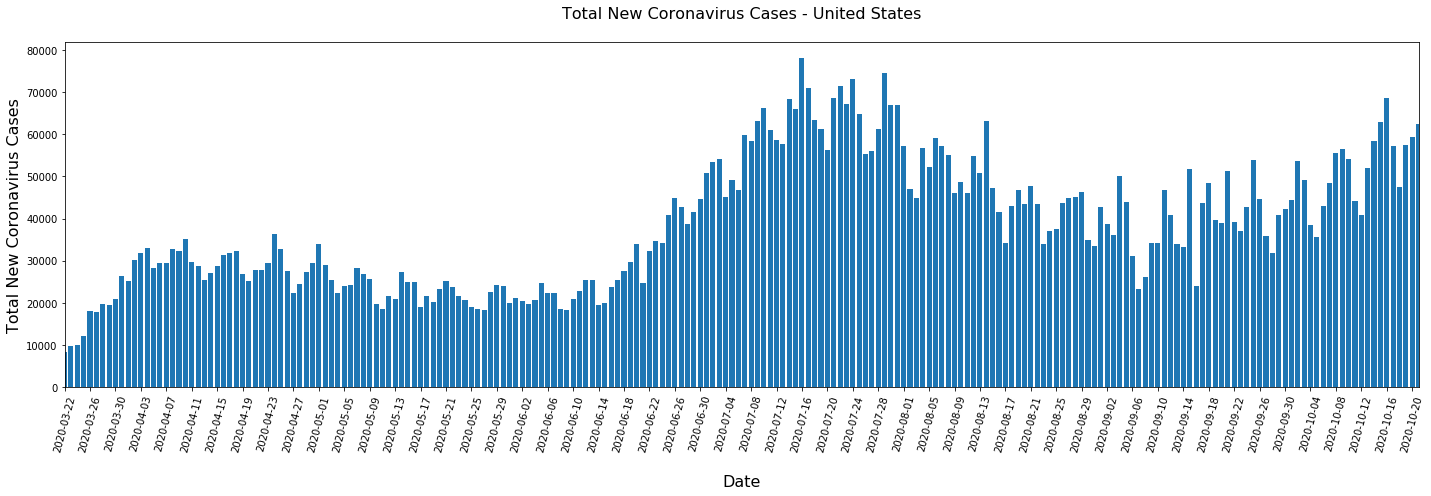

In [70]:
# Create a dataframe to show the trend of total US coronavirus cases by date
tot_us_cases_trend_df = covid_state_df.reset_index().set_index('Date')
tot_cases_gb = tot_us_cases_trend_df.groupby('Date')
tot_us_cases_trend_df = tot_cases_gb[['Total Cases', 'New Cases', 'Total Deaths', 'New Deaths']].sum()
#Export dataframe to .csv file
tot_us_cases_trend_df.to_csv('Resources/tot_us_cases_trend_df.csv')

# Plot the data as a bar chart
fig, ax = plt.subplots(figsize=(20, 7))
ax.bar(tot_us_cases_trend_df.index.values, tot_us_cases_trend_df['New Cases'])
max_date = tot_us_cases_trend_df.index.max()
ax.set_xlim(['2020-03-22',max_date])

# Set the x axis labels to show every 6th day
ax.set_xticks(ax.get_xticks()[::4])
plt.xticks(rotation=75)

# Set the plot titles and labels
plt.title('Total New Coronavirus Cases - United States\n', fontsize=16)
plt.xlabel('\nDate', fontsize=16)
plt.ylabel('Total New Coronavirus Cases', fontsize=16)
plt.tight_layout()

In [68]:
# Show the total cases in the US
total_us_cases = last_state_date_df['Total Cases'].sum()
new_us_cases = last_state_date_df['New Cases'].sum()
total_us_deaths = last_state_date_df['Total Deaths'].sum()
new_us_deaths = last_state_date_df['New Deaths'].sum()
date = last_state_date_df['Date'].max()

print(f'Coronavirus stats for The United States as of: {date}')
print("\n"f'Total US Cases: {total_us_cases:,}')
print(f'Total New US Cases: {new_us_cases:,}')
print(f'Total US Deaths: {total_us_deaths:,}')
print(f'Total New US Deaths: {new_us_deaths:,}')

Coronavirus stats for The United States as of: 2020-10-21

Total US Cases: 8,257,423
Total New US Cases: 62,389
Total US Deaths: 221,105
Total New US Deaths: 1,103


### Top 5 States With the Most Coronavirus Cases

In [61]:
# Show the top 5 states having the most coronavirus cases
state_group = covid_state_df.groupby('State')
covid_state_df=covid_state_df.sort_values(by='Date', ascending=False)
covid_state_df

last_state_date_df = state_group.last()
last_state_date_df.sort_values(by=['Date', 'Total Cases'], ascending=[False,False], inplace=True)
last_state_date_df.head(5)

,Total Cases,New Cases,Total Deaths,New Deaths,Fatality Rate,Latitude,Longitude,Date
State,,,,,,,,
California,886939,3193,17167,112,0.0194,36.1162,-119.6816,2020-10-21
Texas,868981,6704,17652,94,0.0203,31.0545,-97.5635,2020-10-21
Florida,762533,2144,16210,105,0.0213,27.7663,-81.6868,2020-10-21
New York,488506,2026,33371,5,0.0683,42.1657,-74.9481,2020-10-21
Illinois,358799,4342,9605,68,0.0268,40.3495,-88.9861,2020-10-21


### Total Cases by County Heatmap

In [63]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

In [64]:
# Store Lat and lng into locations
locations = map_county_df[['Latitude', "Longitude"]].astype(float)
total_cases=map_county_df['Total Cases'].astype(float)

In [65]:
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=total_cases,
                                 dissipating=False, max_intensity=.85,
                                 point_radius=3)                           
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

### Total Coronavirus Cases by County

In [21]:
# Create a dataframe based on county information
covid_county_df.sort_values(by='Date', ascending=False, inplace=True)
county_group = covid_county_df.groupby(['State', 'County'])
covid_county_last_df = county_group.first()
covid_county_last_df.sort_values(by=['State', 'Total Cases'], ascending=[False, False], inplace=True)

# Show the total coronavirus cases by county in California
california_cases_by_county_df = covid_county_last_df.loc['California']
california_cases_by_county_df

,Total Cases,New Cases,Total Deaths,New Deaths,Date,Latitude,Longitude
County,,,,,,,
Los Angeles,290486,477,6944,32,2020-10-21,34.308284,-118.228241
Riverside,65056,388,1275,2,2020-10-21,33.743150,-115.993358
San Bernardino,60945,324,1065,37,2020-10-21,34.840603,-116.177469
Orange,57635,262,1423,11,2020-10-21,33.701475,-117.764600
San Diego,53263,263,863,6,2020-10-21,33.034846,-116.736533
Kern,33551,54,413,3,2020-10-21,35.343294,-118.727780
Fresno,30220,68,430,0,2020-10-21,36.757339,-119.646695
Sacramento,24811,229,474,3,2020-10-21,38.451068,-121.342537
Santa Clara,23591,133,382,0,2020-10-21,37.231049,-121.697046


In [22]:
# Show the total coronavirus cases by county in Indiana
indiana_cases_by_county_df = covid_county_last_df.loc['Indiana']
indiana_cases_by_county_df

,Total Cases,New Cases,Total Deaths,New Deaths,Date,Latitude,Longitude
County,,,,,,,
Marion,24905,208,785,1,2020-10-21,39.781636,-86.138263
Lake,13380,160,352,0,2020-10-21,41.418743,-87.382776
St. Joseph,8985,108,161,2,2020-10-21,41.617568,-86.290408
Elkhart,8530,61,132,0,2020-10-21,41.597612,-85.858757
Allen,7978,98,222,0,2020-10-21,41.091943,-85.068006
Hamilton,6000,38,113,0,2020-10-21,40.073065,-86.052447
Vanderburgh,5675,82,60,0,2020-10-21,38.026588,-87.587631
Tippecanoe,3587,40,14,0,2020-10-21,40.388727,-86.894140
Monroe,3222,15,38,0,2020-10-21,39.161300,-86.524144


### Plot Total Coronavirus Cases in Los Angeles County, CA

Text(0, 0.5, 'Total Coronavirus Cases')

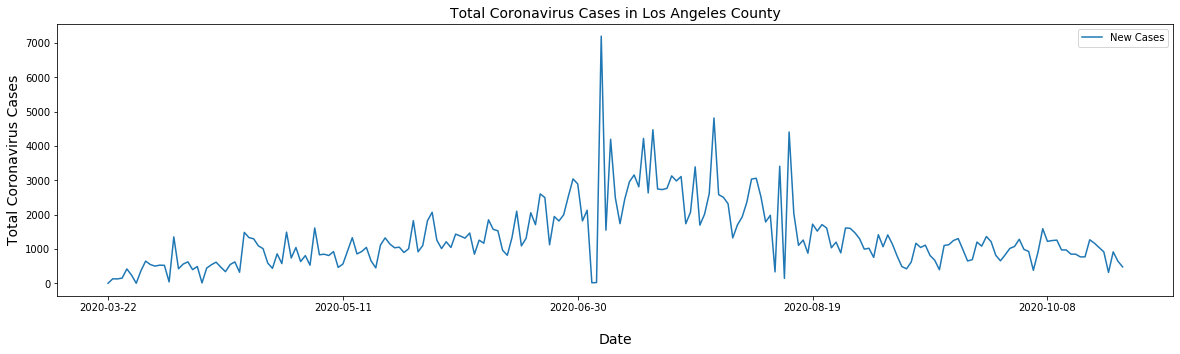

In [23]:
# Plot the number of cases for LA County
la_county_df = covid_county_df.loc['California'][['County','New Cases','Date']]
mask1 = la_county_df['County']=='Los Angeles'
la_county_df=la_county_df[mask1]
la_county_df.sort_values(by='Date', inplace=True)

la_county_df.plot(kind='line', x='Date', y='New Cases', figsize=(20,5))
plt.title("Total Coronavirus Cases in Los Angeles County", fontsize=14)
plt.xlabel("\nDate", fontsize=14)
plt.ylabel("Total Coronavirus Cases", fontsize=14)

In [24]:
new_cases_df = la_county_df.sort_values(by='Date', ascending=False).head(1)
new_cases = new_cases_df.loc['California']['New Cases']
date = new_cases_df.loc['California']['Date']
tot_cases = california_cases_by_county_df.loc['Los Angeles']['Total Cases']
print(f'There were {new_cases:,} new cases reported for a total of {tot_cases:,} cases on {date} in LA County, CA.')

There were 477 new cases reported for a total of 290,486 cases on 2020-10-21 in LA County, CA.


### Plot Total Coronavirus Cases in Fulton County, IN

Text(0, 0.5, 'Total New Coronavirus Cases')

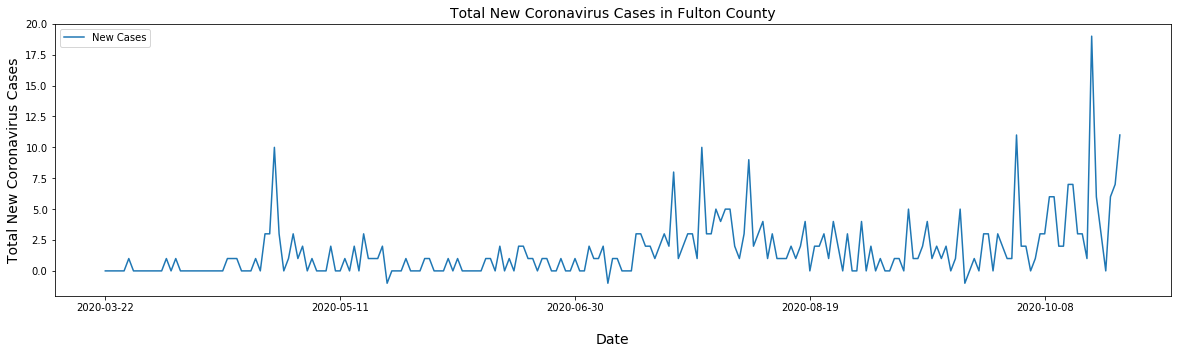

In [71]:
# Plot the number of cases for Fulton County
fulton_county_df = covid_county_df.loc['Indiana'][['County','New Cases','Date']]
mask1 = fulton_county_df['County']=='Fulton'
fulton_county_df=fulton_county_df[mask1]
fulton_county_df.sort_values(by='Date', inplace=True)

fulton_county_df.plot(kind='line', x='Date', y='New Cases', figsize=(20,5))
plt.title("Total New Coronavirus Cases in Fulton County", fontsize=14)
plt.xlabel("\nDate", fontsize=14)
plt.ylabel("Total New Coronavirus Cases", fontsize=14)

In [26]:
new_cases_df = fulton_county_df.sort_values(by='Date', ascending=False).head(1)
new_cases = new_cases_df.loc['Indiana']['New Cases']
date = new_cases_df.loc['Indiana']['Date']
tot_cases = indiana_cases_by_county_df.loc['Fulton']['Total Cases']
print(f'There were {new_cases:,} new cases reported for a total of {tot_cases} cases on {date} in Fulton County, CA.')

There were 11 new cases reported for a total of 347 cases on 2020-10-21 in Fulton County, CA.


### Plot Total Coronavirus cases in California

In [27]:
cal_plots_df=state_plots_df[['State', 'Total Cases']]
mask1 = cal_plots_df['State']=='California'
mask2 = cal_plots_df['State'] == 'Indiana'

cal_plots_df = cal_plots_df[mask1]

Text(0, 0.5, 'Total Covid Cases')

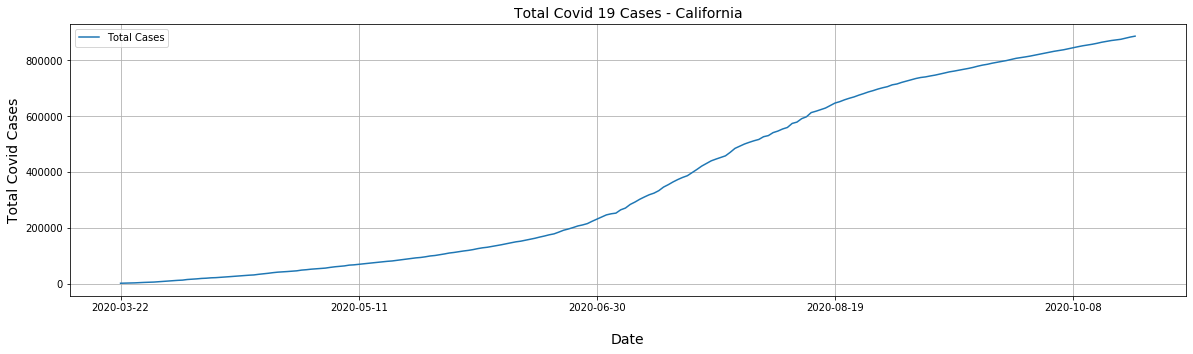

In [28]:
cal_plots_df.plot.line( y='Total Cases', figsize=(20,5), grid=True)

# Label plot
plt.title("Total Covid 19 Cases - California", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('Total Covid Cases', fontsize=14)

In [29]:
tot_cases_today = last_state_date_df.loc['California']['Total Cases']
date = last_state_date_df.loc['California']['Date']
print(f'Total number of coronavirus cases reported on {date}: {tot_cases_today:,}')

Total number of coronavirus cases reported on 2020-10-21: 886,939


### Plot New Coronavirus cases in California

In [30]:
cal_plots_df=state_plots_df[['State', 'New Cases']]
mask1 = cal_plots_df['State']=='California'

cal_plots_df = cal_plots_df[mask1]

Text(0, 0.5, 'New Covid Cases')

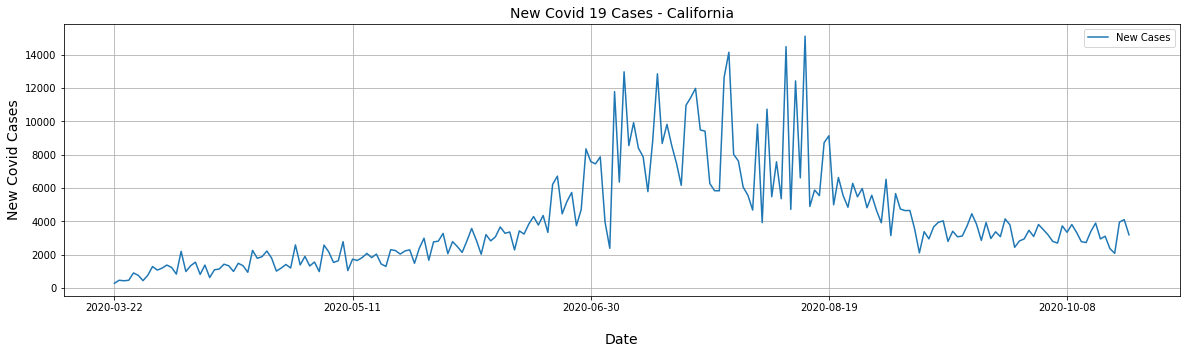

In [31]:
cal_plots_df.plot.line( y='New Cases', figsize=(20,5), grid=True)

# Label plot
plt.title("New Covid 19 Cases - California", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('New Covid Cases', fontsize=14)

In [32]:
new_cases_today = last_state_date_df.loc['California']['New Cases']
date = last_state_date_df.loc['California']['Date']
print(f'Total number of new coronavirus cases reported on {date}: {new_cases_today:,}')

Total number of new coronavirus cases reported on 2020-10-21: 3,193


### Plot Total Coronavirus Deaths in California

In [33]:
cal_plots_df=state_plots_df[['State', 'Total Deaths']]
mask1 = cal_plots_df['State']=='California'

cal_plots_df = cal_plots_df[mask1]

Text(0, 0.5, 'Total Covid Deaths')

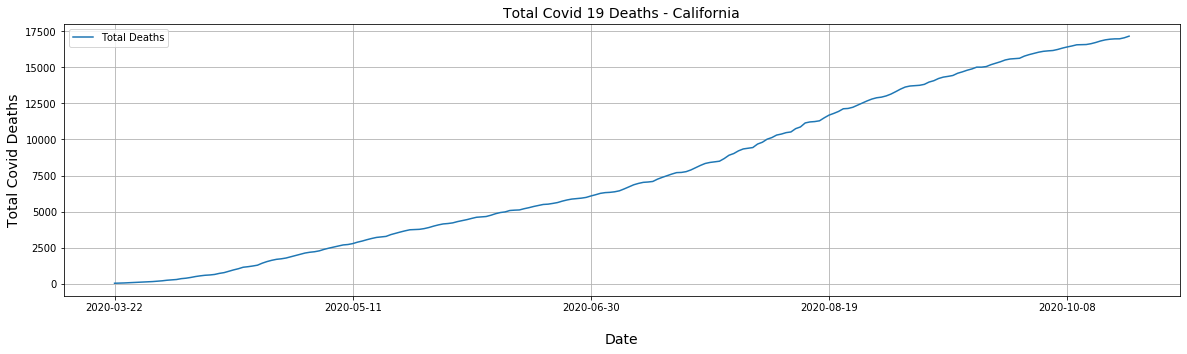

In [34]:
cal_plots_df.plot.line( y='Total Deaths', figsize=(20,5), grid=True)

# Label plot
plt.title("Total Covid 19 Deaths - California", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('Total Covid Deaths', fontsize=14)

In [35]:
tot_deaths = last_state_date_df.loc['California']['Total Deaths']
date = last_state_date_df.loc['California']['Date']
print(f'Total number of coronavirus deaths as of {date}: {tot_deaths:,}')

Total number of coronavirus deaths as of 2020-10-21: 17,167


### Plot New Coronavirus Deaths in California

In [36]:
cal_plots_df=state_plots_df[['State', 'New Deaths']]
mask1 = cal_plots_df['State']=='California'

cal_plots_df = cal_plots_df[mask1]

Text(0, 0.5, 'New Covid Deaths')

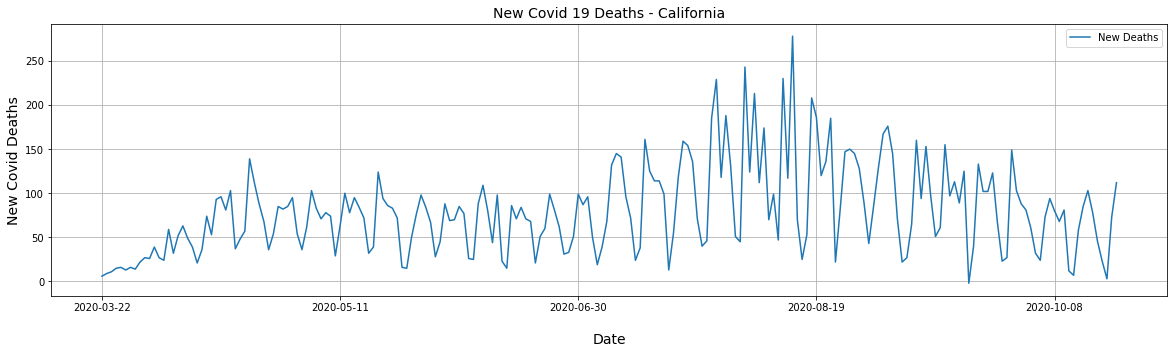

In [37]:
cal_plots_df.plot.line( y='New Deaths', figsize=(20,5), grid=True)

# Label plot
plt.title("New Covid 19 Deaths - California", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('New Covid Deaths', fontsize=14)

In [38]:
new_deaths = last_state_date_df.loc['California']['New Deaths']
date = last_state_date_df.loc['California']['Date']
print(f'Total number of new coronavirus deaths reported on {date}: {new_deaths:,}')

Total number of new coronavirus deaths reported on 2020-10-21: 112


### Plot Total Coronavirus cases in Indiana

In [39]:
ind_plots_df=state_plots_df[['State', 'Total Cases']]
mask1 = ind_plots_df['State'] == 'Indiana'

ind_plots_df = ind_plots_df[mask1]

Text(0, 0.5, 'Total Covid Cases')

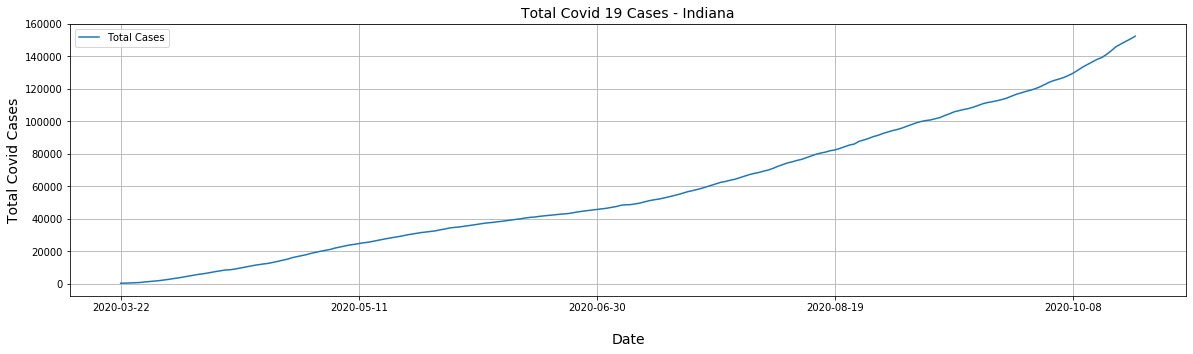

In [40]:
ind_plots_df.plot.line( y='Total Cases', figsize=(20,5), grid=True)

# Label plot
plt.title("Total Covid 19 Cases - Indiana", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('Total Covid Cases', fontsize=14)

In [41]:
tot_cases_today = last_state_date_df.loc['Indiana']['Total Cases']
date = last_state_date_df.loc['Indiana']['Date']
print(f'Total number of coronavirus cases reported on {date}: {tot_cases_today:,}')

Total number of coronavirus cases reported on 2020-10-21: 152,396


### Plot New Coronavirus cases in Indiana

In [42]:
ind_plots_df=state_plots_df[['State', 'New Cases']]
mask1 = ind_plots_df['State'] == 'Indiana'

ind_plots_df = ind_plots_df[mask1]

Text(0, 0.5, 'New Covid Cases')

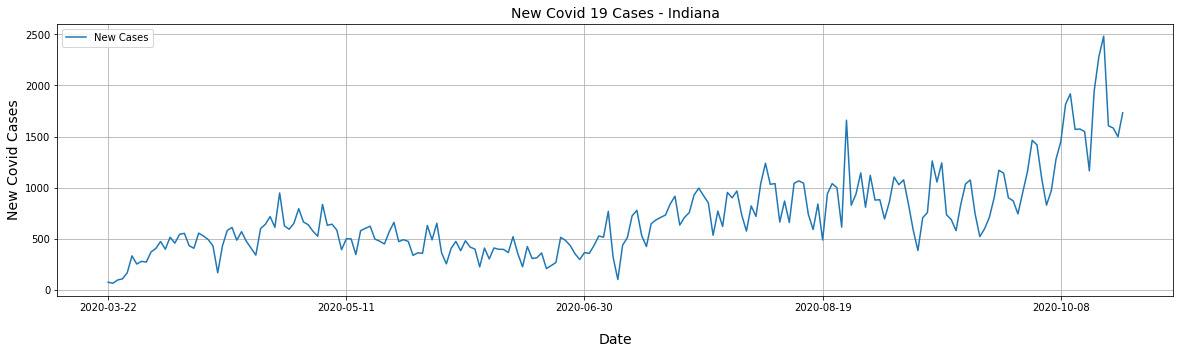

In [43]:
ind_plots_df.plot.line( y='New Cases', figsize=(20,5), grid=True)

# Label plot
plt.title("New Covid 19 Cases - Indiana", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('New Covid Cases', fontsize=14)

In [44]:
new_cases_today = last_state_date_df.loc['Indiana']['New Cases']
date = last_state_date_df.loc['Indiana']['Date']
print(f'Total number of new coronavirus cases reported on {date}: {new_cases_today:,}')

Total number of new coronavirus cases reported on 2020-10-21: 1,732


### Plot Total Coronavirus Deaths in Indiana

In [45]:
ind_plots_df=state_plots_df[['State', 'Total Deaths']]
mask1 = ind_plots_df['State'] == 'Indiana'

ind_plots_df = ind_plots_df[mask1]

Text(0, 0.5, 'Total Covid Deaths')

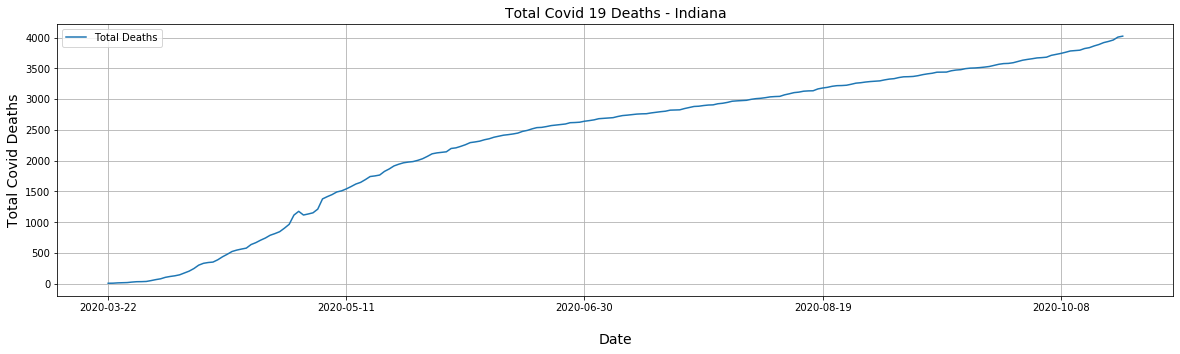

In [46]:
ind_plots_df.plot.line( y='Total Deaths', figsize=(20,5), grid=True)

# Label plot
plt.title("Total Covid 19 Deaths - Indiana", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('Total Covid Deaths', fontsize=14)

In [47]:
tot_deaths = last_state_date_df.loc['Indiana']['Total Deaths']
date = last_state_date_df.loc['Indiana']['Date']
print(f'Total number of coronavirus deaths as of {date}: {tot_deaths:,}')

Total number of coronavirus deaths as of 2020-10-21: 4,023


### Plot New Coronavirus Deaths in Indiana

In [48]:
ind_plots_df=state_plots_df[['State', 'New Deaths']]
mask1 = ind_plots_df['State'] == 'Indiana'

ind_plots_df = ind_plots_df[mask1]

Text(0, 0.5, 'New Covid Deaths')

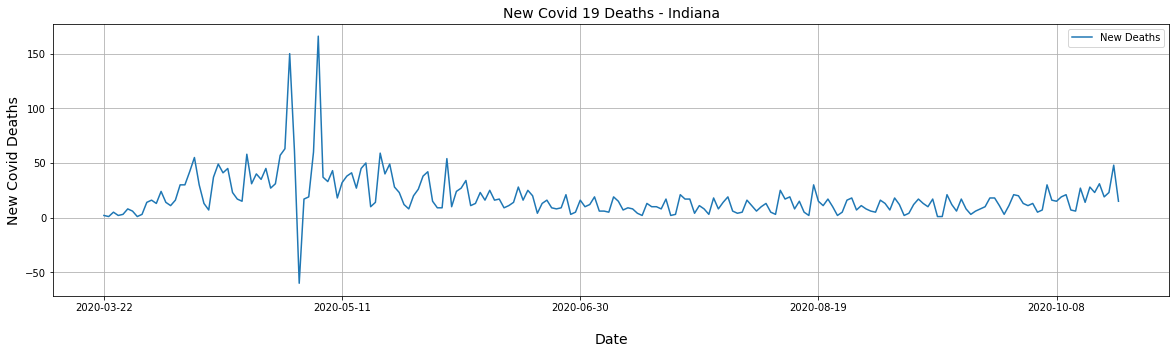

In [49]:
ind_plots_df.plot.line( y='New Deaths', figsize=(20,5), grid=True)

# Label plot
plt.title("New Covid 19 Deaths - Indiana", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('New Covid Deaths', fontsize=14)

In [50]:
new_deaths = last_state_date_df.loc['Indiana']['New Deaths']
date = last_state_date_df.loc['Indiana']['Date']
print(f'Total number of new coronavirus deaths reported on {date}: {new_deaths:,}')

Total number of new coronavirus deaths reported on 2020-10-21: 15
